<a href="https://colab.research.google.com/github/saswat0208/Biding-website/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Starting Jupyter Notebook with necessary imports

In [ ]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
## This step is only required to remove tensorflow completely before starting.
## It works around a bug in tensorflow-colab integration.

!pip uninstall -y tensorflow

!rm -r /usr/local/lib/python3.6/dist-packages/tensorflow
!rm -r /usr/local/lib/python2.7/dist-packages/tensorflow

Uninstalling tensorflow-1.15.0rc3:
  Successfully uninstalled tensorflow-1.15.0rc3
rm: cannot remove '/usr/local/lib/python3.6/dist-packages/tensorflow': No such file or directory


# Installations
* Rasa NLU
* Rasa Core
* SpaCy Language Model

In [ ]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy]==0.12.3;

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 133kB 45.7MB/s 
     |████████████████████████████████| 49.1MB 1.3MB/s 
     |████████████████████████████████| 51kB 16.8MB/s 
     |████████████████████████████████| 307kB 32.2MB/s 
     |████████████████████████████████| 4.9MB 25.3MB/s 
     |████████████████████████████████| 71kB 25.6MB/s 
     |████████████████████████████████| 389kB 49.1MB/s 
     |████████████████████████████████| 665kB 34.9MB/s 
     |████████████████████████████████| 71kB 18.3MB/s 
     |████████████████████████████████| 61kB 26.2MB/s 
     |████████████████████████████████| 122kB 44.4MB/s 
     |████████████████████████████████| 81kB 27.2MB/s 
     |████████████████████████████████| 3.1MB 30.1MB/s 
     |████████████████████████████████| 81kB 29.5MB/s 
     |████████████████████████████████| 204kB 51.0MB/s 
     |████████████████████████████████| 3.1MB 29.5MB/s 
     |████████████████████████████████| 174kB 43.6MB/s 

In [ ]:
!{python} -m spacy download en_core_web_md

     |████████████████████████████████| 95.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.1.0-cp36-none-any.whl size=97126237 sha256=1142d836462a13b48e9f7f2d9c3a7a82aa42a1b873b68fe4bf0459c09e48e8ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-7tgrlnz_/wheels/c1/2c/5f/fd7f3ec336bf97b0809c86264d2831c5dfb00fc2e239d1bb01
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


## Downloading the English Language Model

In [ ]:
!{python} -m spacy link en_core_web_md en --force;

✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_md -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
pip install keras~=2.0.0

     |████████████████████████████████| 307kB 2.9MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.9 which is incompatible.
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


# Importing the Installations

In [ ]:
import rasa_nlu
import rasa_core
import spacy

# 1. Teaching the bot to understand user inputs using Rasa NLU

## Preparing the NLU Training Data

In [ ]:
nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- Quite bad - can I get a cute picture of a [bird](group:birds), please?
- Really bad and only [doggo](group:shibes) pics and change that.
- Not good. The only thing that could make me fell better is a picture of a cute [kitten](group:cats).
- so sad. Only the picture of a [puppy](group:shibes) could make it better.
- I am very sad. I need a [cat](group:cats) picture.
- Extremely sad. Only the cute [doggo](group:shibes) pics can make me feel better.
- Bad. Please show me a [bird](group:birds) pic!
- Pretty bad to be honest. Can you show me a [puppy](group:shibes) picture to make me fell better?

## intent: inform
- A [dog](group:shibes)
- [dog](group:shibes)
- [bird](group:birds)
- a [cat](group:cats)
- [cat](group:cats)
- a [bird](group:birds)
- of a [dog](group:shibes)
- of a [cat](group:cats)
- a [bird](group:birds), please
- a [dog](group:shibes), please

## intent: query
- what can you do for me
- how can you help me
- what can you do
- what help can you offer
- what should i expect from you
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


## Defining the NLU Model Configuration

In [ ]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


## Training the NLU Model.

In [ ]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist(r'/gdrive/My Drive/Colab Notebooks/bot-files/models/nlu/', fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 85 (7 distinct intents)
	- Found intents: 'mood_unhappy', 'greet', 'mood_affirm', 'mood_deny', 'inform', 'mood_great', 'goodbye'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'group'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_crf
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train 

Fitting 2 folds for each of 6 candidates, totalling 12 fits


## Evaluating the NLU model on a random text

In [ ]:
# A helper function for prettier output

def pprint(o):   
    print(json.dumps(o, indent=2))
    
pprint(interpreter.parse("I am very sad. Could you send me a cat picture? "))

{
  "intent": {
    "name": "mood_unhappy",
    "confidence": 0.6593665171713954
  },
  "entities": [
    {
      "start": 35,
      "end": 38,
      "value": "cats",
      "entity": "group",
      "confidence": 0.9139736105889353,
      "extractor": "ner_crf",
      "processors": [
        "ner_synonyms"
      ]
    }
  ],
  "intent_ranking": [
    {
      "name": "mood_unhappy",
      "confidence": 0.6593665171713954
    },
    {
      "name": "goodbye",
      "confidence": 0.1038032395428778
    },
    {
      "name": "mood_great",
      "confidence": 0.09443455403124029
    },
    {
      "name": "greet",
      "confidence": 0.05163954135059433
    },
    {
      "name": "inform",
      "confidence": 0.0350795791530724
    },
    {
      "name": "mood_affirm",
      "confidence": 0.029246210463264904
    },
    {
      "name": "mood_deny",
      "confidence": 0.026430358287554884
    }
  ],
  "text": "I am very sad. Could you send me a cat picture? "
}


## Evaluating the NLU model on a test data
(Here we are using the data at hand i.e nlu.md but it isr recommended to use unseen data)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 85 (7 distinct intents)
	- Found intents: 'goodbye', 'inform', 'mood_great', 'mood_deny', 'mood_affirm', 'greet', 'mood_unhappy'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'group'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 85 examples that have a defined intent out of 85 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9881730469965763
INFO:rasa_nlu.evaluate:Precision: 0.9890756302521008
INFO:rasa_nlu.evaluate:Accuracy:  0.9882352941176471
INFO:rasa_nlu.evaluate:Classification report: 
              precision    recall  f1-score   support

     goodbye       1.00      0.91      0.95        11
       greet       0.93      1.00      0.96        13
      inform    

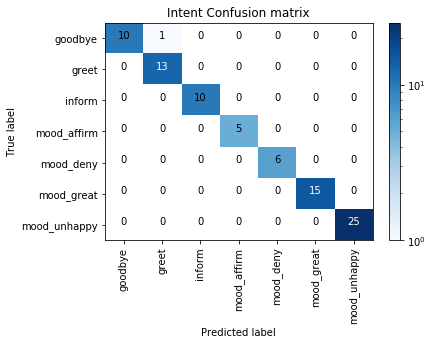

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.973385845057744
INFO:rasa_nlu.evaluate:Precision: 0.9742985714717164
INFO:rasa_nlu.evaluate:Accuracy:  0.9752650176678446
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

      group       0.92      0.67      0.77        18
  no_entity       0.98      1.00      0.99       265

avg / total       0.97      0.98      0.97       283



In [ ]:
# from rasa_nlu.evaluate import run_evaluation

# run_evaluation("nlu.md", model_directory)

# 2. Teaching the bot to respond using Rasa Core

## 1. Writing  Stories

In [ ]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
## happy path 2
* greet
  - utter_greet
* mood_great
* query
  - utter_ask_picture
* inform{"group":"bird"}
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy
  
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - utter_ask_picture
* inform{"animal":"dog"}  
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_picture
* inform{"group":"cat"}
  - action_retrieve_image
  - utter_did_that_help
* mood_deny
  - utter_goodbye
  
## sad path 3
* greet
  - utter_greet
* mood_unhappy{"group":"puppy"}
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


## 2. Defining a Domain

In [ ]:
domain_yml = """
intents:
- greet
- goodbye
- mood_affirm
- mood_deny
- mood_great
- mood_unhappy
- inform
- query

slots:
  group:
    type: text
    
entities:
- group

actions:
- utter_greet
- utter_did_that_help
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ask_picture
- actions.retrieve_image.ApiAction

templates:
  utter_greet:
  - text: "Hey! How are you?"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  
  utter_happy:
  - text: "Great carry on!"

  utter_goodbye:
  - text: "Bye"
  
  utter_ask_picture:
  - text: "If it helps, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?"
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


## Custom Actions

In [ ]:
retrieve_image = """
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display

import requests

class ApiAction(Action):
    def name(self):
        return "action_retrieve_image"

    def run(self, dispatcher, tracker, domain):
        
        group = tracker.get_slot('group')
        
        r = requests.get('http://shibe.online/api/{}?count=1&urls=true&httpsUrls=true'.format(group))
        response = r.content.decode()
        response = response.replace('["',"")
        response = response.replace('"]',"")
   
        
        #display(Image(response[0], height=550, width=520))
        dispatcher.utter_message("Here is something to cheer you up: {}".format(response))
   """
init = ""
!mkdir actions
%store retrieve_image > actions/retrieve_image.py
%store init > actions/__init__.py

Writing 'retrieve_image' (str) to file 'actions/retrieve_image.py'.
Writing 'init' (str) to file 'actions/__init__.py'.


##Save actions in Google drive

In [ ]:
!mkdir -p /gdrive/My\ Drive/Colab\ Notebooks/bot-files/actions
!cp actions/* /gdrive/My\ Drive/Colab\ Notebooks/bot-files/actions

##  Visualising the Training Data

In [ ]:

# !apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
# !breq install graphviz

# !{python} -m pip install pygraphviz;

In [ ]:

# from IPython.display import Image
# from rasa_core.agent import Agent

# agent = Agent('domain.yml')
# agent.visualize("stories.md", "story_graph.png", max_history=2)
# Image(filename="story_graph.png")

## Training a Dialogue Model

In [ ]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

# this will catch predictions the model isn't very certain about
# there is a threshold for the NLU predictions as well as the action predictions
fallback = FallbackPolicy(fallback_action_name="utter_unclear",
                          core_threshold=0.2,
                          nlu_threshold=0.1)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist(r'/gdrive/My Drive/Colab Notebooks/bot-files/models/dialogue')

Processed Story Blocks: 100%|██████████| 7/7 [00:00<00:00, 161.35it/s, # trackers=13]
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 243/243 [00:11<00:00, 21.47it/s, # actions=296]
INFO:rasa_core.featurizers:Created 296 action examples.
Processed actions: 296it [00:00, 347.58it/s, # examples=296]
INFO:rasa_core.policies.memoization:Memorized 296 unique action examples.
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 243/243 [00:10<00:00, 20.81it/s, # actions=296]
INFO:rasa_core.featurizers:Created 296 action examples.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:rasa_core.policies.keras_po

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 18)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6528      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 6,825
Trainable params: 6,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
296/296 [==============================] - 1s 3ms/step - loss: 2.0711 - acc: 0.4088
Epoch 2/200
296/296 [==============================] - 0s 183us/step - loss: 1.9376 - acc: 0.4561
Epoch 3/200
296/296 [==============================] - 0s 217us/step - loss: 1

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/gdrive/My Drive/Colab Notebooks/bot-files/models/dialogue'


# Talk to your Bot

In [ ]:
#Starting the Bot

from rasa_core.agent import Agent
agent = Agent.load(r'/gdrive/My Drive/Colab Notebooks/bot-files/models/dialogue', interpreter=model_directory)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


In [ ]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])
        

Your bot is ready to talk! Type your messages here or send 'stop'
hello
Hey! How are you?
not good
To cheer you up, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?
a puppy
Here is something to cheer you up: https://cdn.shibe.online/shibes/b843afaf7d9d7ab104d81d16fb484fcb9834c68c.jpg
Did that help you?
yes
Great carry on!
